# Additional Python Libraries

If you are using Python, you can install these packages using `pip` in a Jupyter notebook. However, if you are using Anaconda then you will need to install them at the command line in a virtual environment. Check out this excellent [walk-through](https://towardsdatascience.com/a-quick-and-easy-guide-to-managing-conda-environments-87bfe7bab065) to learn more about creating and managing virtual environments using Anaconda.

To learn more about install Python libraries in a Jupyter notebook, check out this great [article](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) by Jake VanderPlas!

In [1]:
# !pip install folium
# !pip install descartes
# !pip install geopandas
# !pip install contextily
# !pip install mapclassify

In [2]:
import folium
import geopandas as gpd
import contextily as ctx

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

# Folium

Maps can be very useful in visualizing geographical data and changes over time. In this notebook, we will start by looking at how we can use the folium library. Folium is a Python library that lets you take advantage of Python's data wrangling capabilities and visualize geospatial data on an interactive leaflet map by wrapping the `Leaflet.js` library. [Leaflet](https://leafletjs.com/) is the leading open-source JavaScript library that is used to build web mapping applications.

To create a simple base map with folium, we just need to pass a list of a location's latitude and longitude coordinates to `Map()`. Check out this handy [website](https://www.gps-coordinates.net/) that lets you look up a place or an address's coordinates!

You'll also notice that these maps are interactive! So we can zoom in and out by clicking the positive and negative buttons in the top-left corner of the map. 

Folium `Map` [documentation](https://python-visualization.github.io/folium/modules.html#module-folium.map)

In [3]:
new_york = folium.Map(location=[40.7128, -73.9352])
new_york

By default, the starting zoom level is set to `10` but we can change that by setting the `zoom_start` parameter. Here, let's see what happens when we lower the level to `6`.

In [4]:
new_york = folium.Map(location=[40.7128, -73.9352], zoom_start=6)
new_york

We can also set the `min_zoom` and `max_zoom` parameters to limit the zoom range!

In [5]:
new_york = folium.Map(location=[40.7128, -73.9352], min_zoom=6, max_zoom=12)
new_york

## Tiles

A tileset is a collection of raster and vector data broken up into a uniform grid of square tiles. As you'll see, each tileset has a different way of representing data in a map. 

By default, folium uses the `OpenStreetMap` map tile. However, the library also includes other options, such as `Stamen Terrain`, `Stamen Toner`, and `Stamen Water Color`. Here, I've added five additional tile layers to our map, giving it 6 layers in total. In addition, I've added `LayerControl()` to the map which allows us to switch between the different layers.

Folium `map.TileLayer` [documentation](https://python-visualization.github.io/folium/modules.html#folium.raster_layers.TileLayer)  
Folium `map.LayerControl` [documentation](https://python-visualization.github.io/folium/modules.html#folium.map.LayerControl)

In [6]:
# Create the base map
europe = folium.Map(location=[50.0, 15.0], zoom_start=3, min_zoom=2, max_zoom=4)

# Add additional tilelayers
folium.TileLayer('cartodbpositron').add_to(europe)
folium.TileLayer('cartodbdark_matter').add_to(europe)
folium.TileLayer('Stamen Terrain').add_to(europe)
folium.TileLayer('Stamen Toner').add_to(europe)
folium.TileLayer('Stamen Water Color').add_to(europe)

# Add a layer control
folium.LayerControl().add_to(europe)

# Plot the updated map
europe

## Markers

We can also add markers to our map to highlight specific locations. Adding markers is a two-step process. First, we need to create a base map and then we can add our markers to it.

We can also use the `Icon()` class to create custom icons for our markers. It takes three arguments&mdash;`color`, `prefix` and `icon`. `color` is used for changing the color of the marker, the `prefix` is used for selecting the icon provider (`fa` for [fontawesome](https://fontawesome.com/v4.7.0/icons/) and `glyphicon` for [GLYPHICONS](https://www.glyphicons.com/)), and `icon` is used for selecting the icon name.

When we hover our mouse over the marker, we can see that the tooltip shows us the text.

Folium `Marker` [documentation](https://python-visualization.github.io/folium/modules.html?highlight=marker)  
Folium `map.Icon` [documentation](https://python-visualization.github.io/folium/modules.html#folium.map.Icon)  

In [7]:
# Create the base map
new_york = folium.Map(location=[40.74843597, -73.98580932], zoom_start=12, min_zoom=12, max_zoom=12)

# Add markers to the map
folium.Marker([40.74843597, -73.98580932],
              popup='<i>Empire State Bldg</i>',
              tooltip='Visit the Empire State Building!',
              icon=folium.Icon(icon='building', prefix='fa')).add_to(new_york)

folium.Marker([40.767459869, -73.970710754],
              popup='<b>Central Park</b>',
              icon=folium.Icon(color='purple', prefix='glyphicon', icon='off')).add_to(new_york)

folium.Marker([40.75271606, -73.97721862],
              popup='Grand Central Terminal',
              icon=folium.Icon(color='red', icon='train', prefix='fa')).add_to(new_york)

folium.Marker([40.713409424, -74.013343811],
              popup='One World Trade Center',
              icon=folium.Icon(color='green', icon='building-o', prefix='fa')).add_to(new_york)

# Plot the updated map
new_york

In [8]:
# Find out what more you can do with icons!
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon', **kwargs)
 |  
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `

# GeoPandas

GeoPandas is an open-source package that helps users work with geospatial data by combining the data wrangling capabilities of the pandas library with other Python packages, such as like [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html), that work with spatial data. 

Geospatial data is often available from specific GIS file formats or data stores, such ESRI shapefiles, GeoJSON, PostGIS (PostgreSQL) databases, and more. Fortunately, the GeoPandas library can read in almost any vector-based spatial data format using the `read_file()` method. This method returns a `GeoDataFrame` object, which inherits many of the pandas `DataFrame` methods you are already familar with. However, one key way they differ is that a `GeoDataFrame` will always include a `geometry` that column stores coordinates for the geographic features in the dataset. 

## Geometries: Points, Linestrings & Polygons

GeoPandas uses the shapely library to perform geometric operations. The three key types of spatial vector data you will work are `Point`, `LineString`, and `Polygon`. These types can then be combined to the create multi-part geometries, such as a `MultiPolygon`.
- `Point`: Represents a single point in space, such as a city's latitude and longitude coordinates.
- `LineString`: Represents a sequence of points that form a line. For example, two or more pairs of latitude/longitude coordinates that can be connected to form a continuous segment.
- `Polygon`: It is made up of three or more latitude/longitude pairs that are joined in a specificed order to create an enclosed region or a filled area.

For these examples, we will use the datasets that come with the GeoPandas library. The `naturalearth_lowres` and `nybb` dataset contain `Polygon` and `MultiPolygon` shapes and the `naturalearth_cities` dataset contains `Point` shapes. We'll start with `naturalearth_lowres` which has information about each country's shape and information about the country's estimated population and GDP.

GeoPandas [documentation](https://geopandas.org/index.html)  
GeoPandas `read_file` [documentation](https://geopandas.org/reference/geopandas.read_file.html)  

In [9]:
# Returns names of available maps
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [10]:
# Load the example dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
type(world)

geopandas.geodataframe.GeoDataFrame

In [11]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Coordinate Reference System (CRS)

A coordinate reference system (CRS) determines how the two-dimensional coordinates of the geometry objects should be related to actual places on the earth.

For the `world` DataFrame, we can see that it uses the EPSG 4326/WGS84 CRS, which is one of the most popular since it is used by GPS. The Spherical Mercator, EPSG 3395, is used by Google Maps, OpenStreetMap, and Bing. You can learn more about coordinate reference systems [here](https://docs.qgis.org/3.10/en/docs/gentle_gis_introduction/coordinate_reference_systems.html).

In [12]:
# Find the coordinate reference system (CRS)
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plot

The GeoPandas library provides a high-level interface to the matplotlib library for plotting maps. To create a simple map, we can call the GeoDataFrame `plot()` method. Since we didn't pass it any parameters, it will plot a single color map using the dataframe's `geometry` column.

`geoPandas.Series.plot` [documentation](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.plot.html#geopandas.GeoSeries.plot)

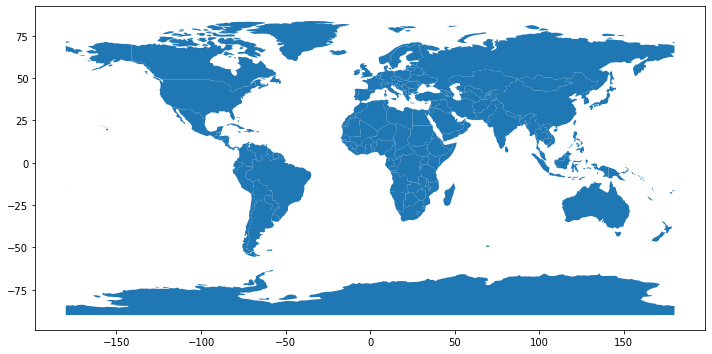

In [13]:
ax = world.plot(figsize=(12,6))

Here, we'll only have the borders in our map show. In addition, we can use matplotlib to hide the x- and y-axis.

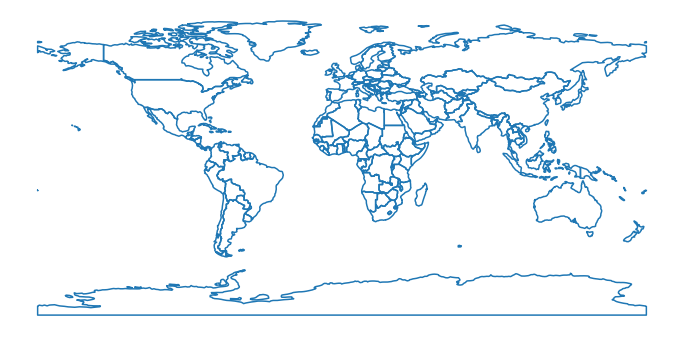

In [14]:
ax = world.boundary.plot(figsize=(12,6))

# Hide the x- and y-axis
ax.set_axis_off()

You can also use a lot of the matplotlib parameters that you've learned the past few weeks in class.

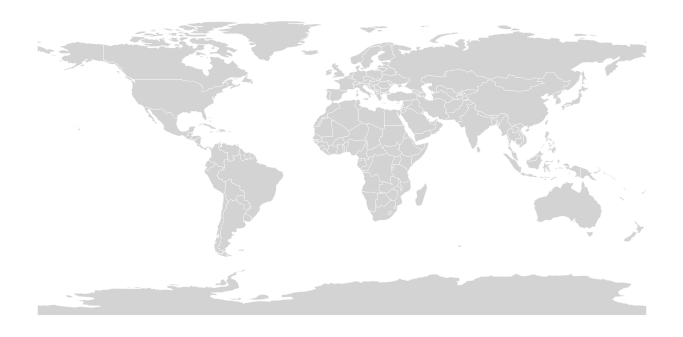

In [15]:
ax = world.plot(figsize=(12,6), linewidth=0.25, edgecolor='white', color='lightgrey')

# Hide the x- and y-axis
ax.set_axis_off()

We can also plot a single country.

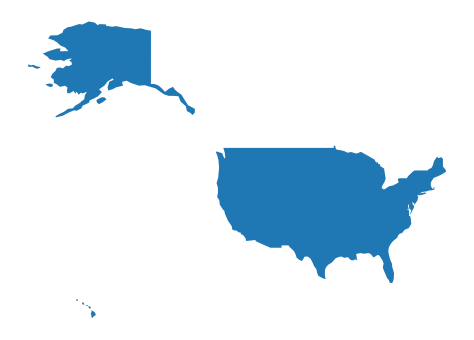

In [16]:
# Subsets the GeoDataFrame
usa = world[world.name == 'United States of America']

# Plot the United States
ax = usa.plot(figsize=(9,6))

# Hide the x- and y-axis
ax.set_axis_off()

# Choropleth Maps

In a choropleth map, the geographical areas or regions are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. They are a good way to show how a variable varies across a geographic area.

If the variable is linked to the area, it's important to remember to normalize it first!  For example, you have to normalize your variable first. (For example, you have to show a density of population and not a number of inhabitants that would be biased by the size of the area. 

GeoPandas makes it easy to create a choropleth map by passing the feature name to the `plot()` method's `column` parameter. Here, we'll use the `"gdp_md_est"` column to plot the countries gross domestic product (GDP).

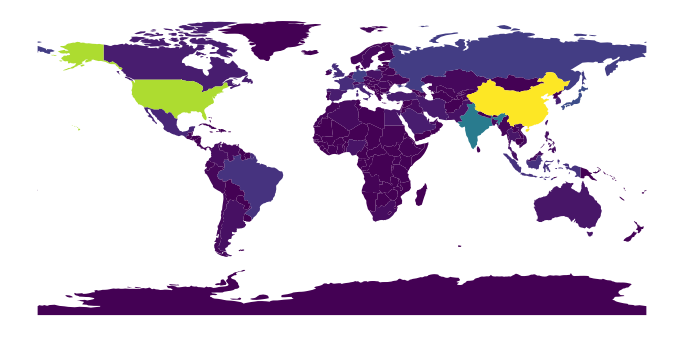

In [17]:
# Plot a choropleth map
ax = world.plot(column='gdp_md_est', figsize=(12,6))

# Hide the x- and y-axis
ax.set_axis_off()

Here, let's remove Antartica from the map since we are looking at a country's GDP.

When plotting a map, we can also enable a legend by setting `legend=True`.

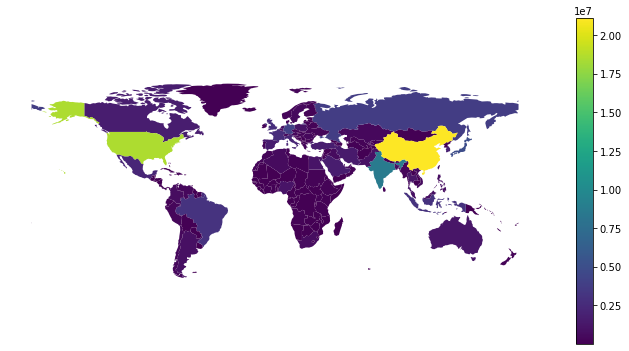

In [18]:
# Drop Antarctica from the dataset
world = world[world['name'] != 'Antarctica']

# Plot the data
ax = world.plot(column='gdp_md_est', figsize=(12,6), legend=True)

# Hide the x- and y-axis
ax.set_axis_off()

By default, GeoPandas will plot the color bar vertically, and since our map projection is twice as wide as it is tall, this distorts our final image. However, since GeoPandas is built on top of matplotlib, we can adjust this.

Matplotlib `make_axes_locatable` [documentation](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.axes_divider.make_axes_locatable.html?highlight=make_axes_locatable)  
Matplotlib Colorbar with Axes Divider [Guide](https://matplotlib.org/stable/gallery/axes_grid1/demo_colorbar_with_axes_divider.html?highlight=make_axes_locatable)

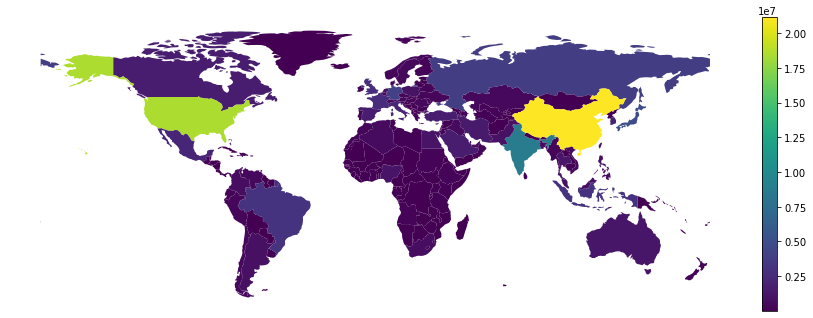

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Instantiate the Figure and Axes object
fig, ax = plt.subplots(1, 1, figsize=(14,7))

# Locate and divide the Axes object 
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.1)

# Plot the data
world.plot(column='gdp_md_est', ax=ax, legend=True, cax=cax)

# Hide the x- and y-axis
ax.set_axis_off()

In the previous map, we simply plotted each country's GDP. However, choropleths tend to work best when the coloring represents a density. This is because people tend to perceive larger areas as corresponding to larger amounts, so dividing by the surface area or the population helps to counteract this. For example, we would want to show the density of a country's population and not just the number of people who live there since it would be biased by the size of the area.

Let's also use a different color map since remember that people tend to associate darker colors with higher values.

/mnt/c/Users/KristenMcIntyre/Code/georgetown/data-visualization/env/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


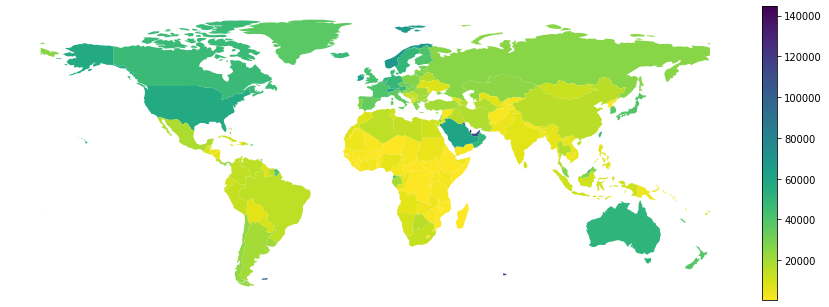

In [20]:
# Calculate the GDP per capita
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']

# This column was originally calculated in millions
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000000

# Instantiate the Figure and Axes object
fig, ax = plt.subplots(1, 1, figsize=(14,7))

# Locate and divide the Axes object 
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.1)

# Plot the data
world.plot(figsize=(12,6), column='gdp_per_cap', cmap='viridis_r', legend=True, ax=ax, cax=cax)
# world.plot(figsize=(12,6), column='gdp_per_cap', cmap='BuPu', legend=True, ax=ax, cax=cax)
# world.plot(figsize=(12,6), column='gdp_per_cap', cmap=plt.cm.get_cmap('BuPu', 6), legend=True, ax=ax, cax=cax)
# world.plot(figsize=(12,6), column='gdp_per_cap', cmap=sns.color_palette('crest', as_cmap=True), legend=True, ax=ax, cax=cax)
# world.plot(figsize=(12,6), column='gdp_per_cap', cmap=sns.color_palette('flare', as_cmap=True), legend=True, ax=ax, cax=cax)
# world.plot(figsize=(12,6), column='gdp_per_cap', cmap=sns.cubehelix_palette(as_cmap=True), legend=True, ax=ax, cax=cax)

# Hide the x- and y-axis
ax.set_axis_off()

## Contextily

Now, let's look at another one of the sample datasets.

In [21]:
# Read the NYC boroughs dataset
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


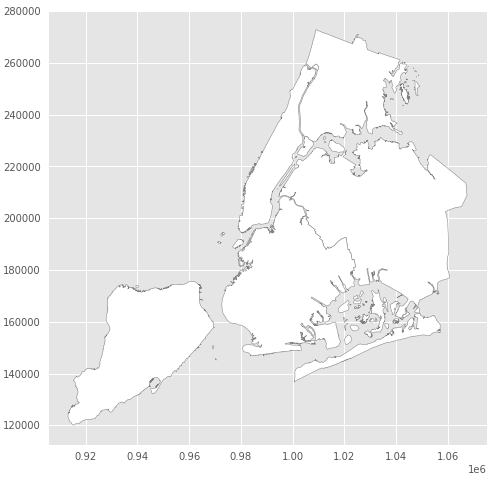

In [22]:
with plt.style.context(('seaborn', 'ggplot')):
    nybb.plot(figsize=(12,8), color='white', edgecolor='grey')

**Convert the data to Web Mercator CRS**

Typically, map tiles are provided in Web Mercator (EPSG 3857), so we need to convert our data first to have the same CRS. Now we can combine our shapes and background tiles in the same map.

In [23]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
# Convert the dataset's CRS
df = nybb.to_crs(epsg=3857)

We can see the changes between the two files by looking at the datasets' `geometry` columns.

In [25]:
nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [26]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-8243264.851 4948597.836, -824..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-8219461.925 4952778.732, -821..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-8222843.672 4950893.793, -822..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-8238858.864 4965915.024, -823..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-8226155.130 4982269.949, -822..."


Now we can use the contextily library to add a base map.

Contextily `add_basemap` [documentation](https://contextily.readthedocs.io/en/latest/working_with_local_files.html?highlight=add_basemap#Reading-with-add_basemap)

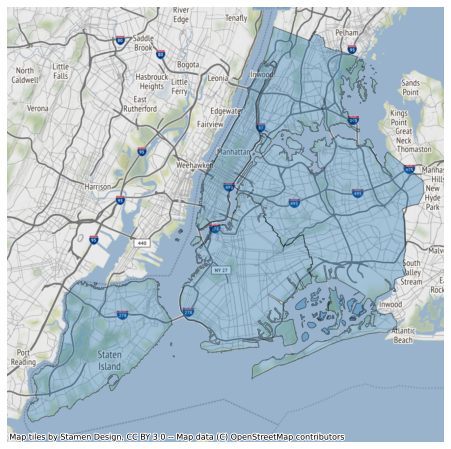

In [27]:
# Plot our data
ax = df.plot(figsize=(8,8), alpha=0.35, edgecolor='k')

# Add a base map
ctx.add_basemap(ax)

# Hide the x- and y-axis
ax.set_axis_off()

The contextily library will use the Stamen Terrain map tile by default. However, we can specify a different style by using the `ctx.providers()` method.

Contextily `providers` [Tutorial](https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

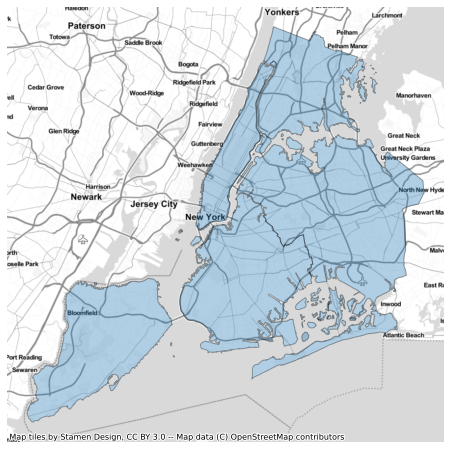

In [28]:
# Plot the data
ax = df.plot(figsize=(8,8), alpha=0.35, edgecolor='k')

# Add a base map
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Hide the x- and y-axis
ax.set_axis_off()

Here, let's use a new color palette so that we can see the individual boroughs!

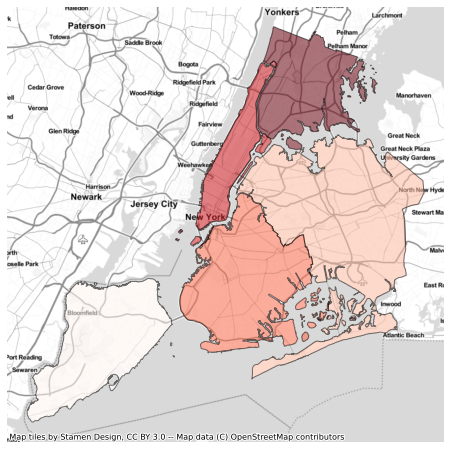

In [29]:
# Plot the data
ax = df.plot(figsize=(8,8), alpha=0.55, edgecolor='k', cmap='Reds')

# Add a base map
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Hide the x- and y-axis
ax.set_axis_off()